In [1]:
from emcee_rapper.mcmcwrapper import MCMCWrapper
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def linear_fit(pars, x):
    m, b0 = pars
    return m*x + b0

In [3]:
true_params = [2.0, -1.0]
x_data = np.linspace(-5, 5, 100)
y_true = linear_fit(true_params, x_data)
np.random.seed(42)
y_obs = y_true + np.random.normal(0, 1.0, size=len(x_data))

parnames = ["m", "b0"]
initial_guess = [1.0, 0.0]
prior_bounds = [[-10, 10], [-10, 10]]
noise_std = 1.0

wrapper = MCMCWrapper(
    model_function=linear_fit,
    data=y_obs,
    x=x_data,
    varnames=parnames,
    varvalues=initial_guess,
    priorvars=prior_bounds,
    noise=noise_std
)

sampler = wrapper.run_mcmc(nwalkers=30, nsteps=1000)

100%|███████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 964.00it/s]

m: 2.016 (+0.035/-0.035)
b0: -1.104 (+0.101/-0.098)


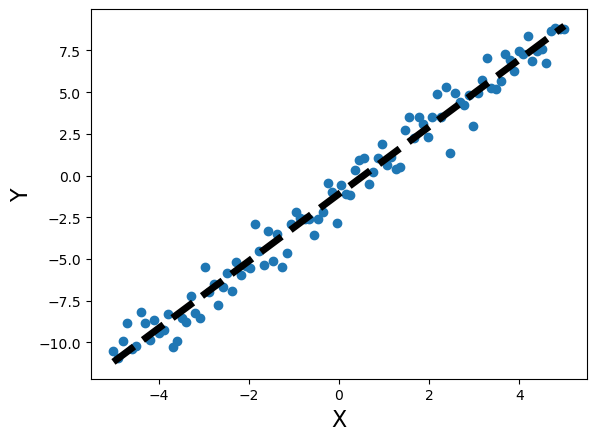

In [4]:
samples = sampler.get_chain(discard=200, thin=15, flat=True)

medians = np.median(samples, axis=0)

fig, ax = plt.subplots()
ax.plot(x_data,y_obs, 'o')
ax.plot(x_data, linear_fit([medians[0], medians[1]], x_data), 'k--', lw=5)
plt.xlabel('X', size=16)
plt.ylabel('Y', size=16)
plt.show()

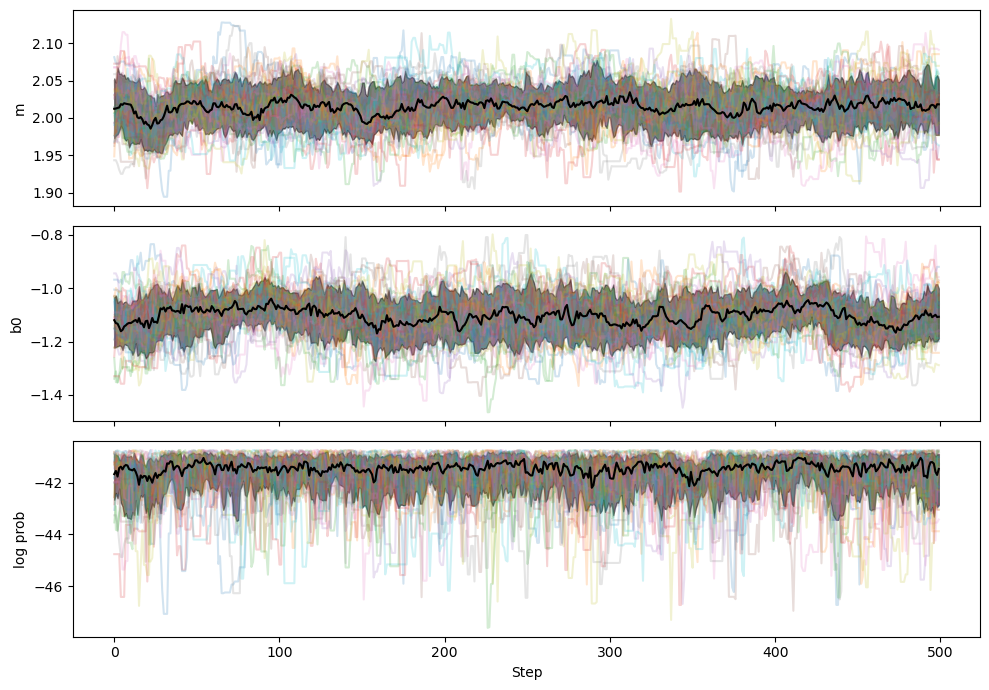

In [5]:
wrapper.walker_plot(discard=500)

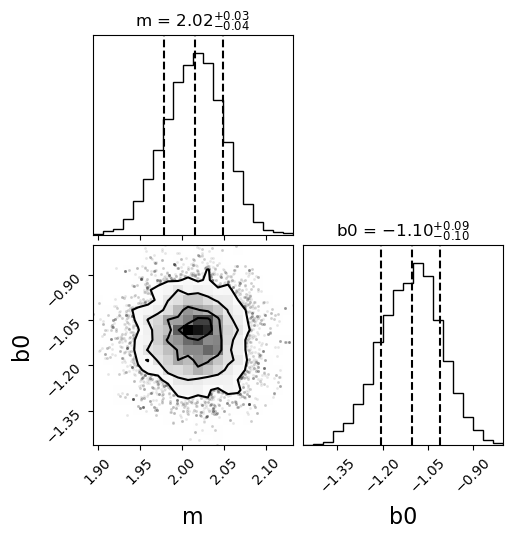

In [6]:
wrapper.corner_plot(discard = 500)